In [15]:
library(readxl)
library(dplyr)
customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

Warning message:
"package 'readxl' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [16]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [17]:
install.packages('ggplot2')

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\WAN\AppData\Local\Temp\RtmpiKrgyN\downloaded_packages


In [18]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [19]:
library(dplyr)

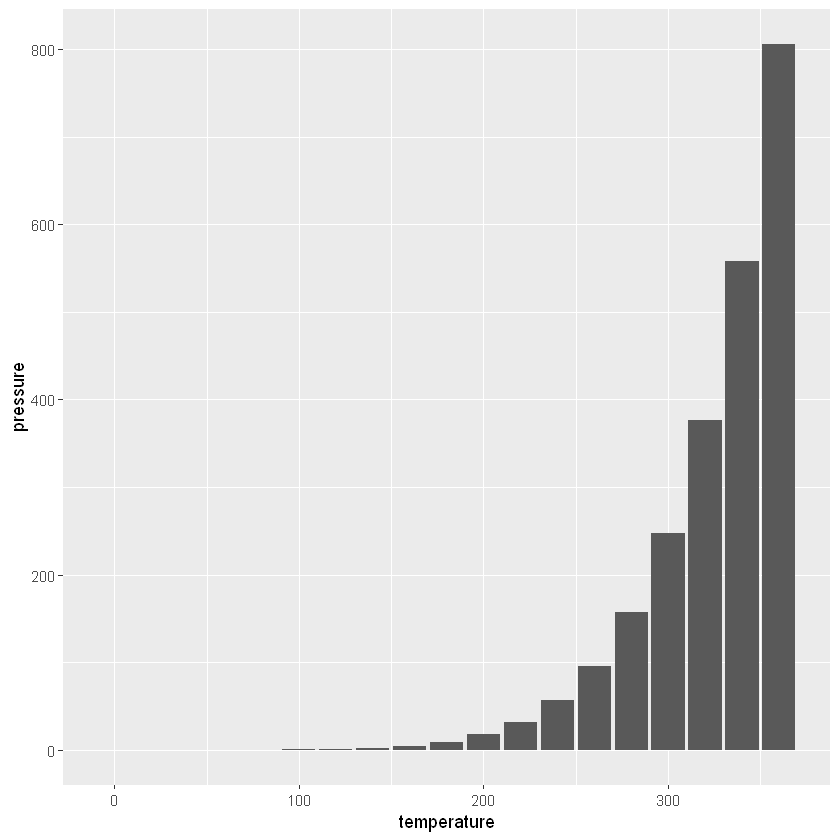

In [20]:
ggplot(data = pressure, aes(x = temperature, y = pressure)) + geom_col()

In [21]:
df_cfm_order <- inner_join(reservation_r, order_info_r, by = "reserv_no") %>%
    select(customer_id, reserv_no, visitor_cnt, cancel, order_no, item_id, sales) %>%
arrange(customer_id, reserv_no, item_id)

In [22]:
head(df_cfm_order)

customer_id,reserv_no,visitor_cnt,cancel,order_no,item_id,sales
W1327595,2019061801,2,N,190618107186310010,M0001,48000
W1327595,2019071801,4,N,190718107186310010,M0005,140000
W1327803,2019060301,4,N,190603578341100100,M0005,140000
W1327803,2019091506,2,N,190915137187310010,M0005,70000
W1328432,2019060601,4,N,190606607189610010,M0005,140000
W1328432,2019060601,4,N,190606607189610010,M0010,12000


In [23]:
df_sct_graph <- df_cfm_order %>% 
    group_by(customer_id) %>% 
    summarise(vst_cnt = sum(visitor_cnt), cust_amt = sum(sales/1000))

In [24]:
head(df_sct_graph)

customer_id,vst_cnt,cust_amt
W1327595,6,188
W1327803,6,210
W1328432,20,246
W1328505,20,287
W1328786,1,10
W1328985,8,178


Warning message:
"Removed 5 rows containing missing values (geom_point)."

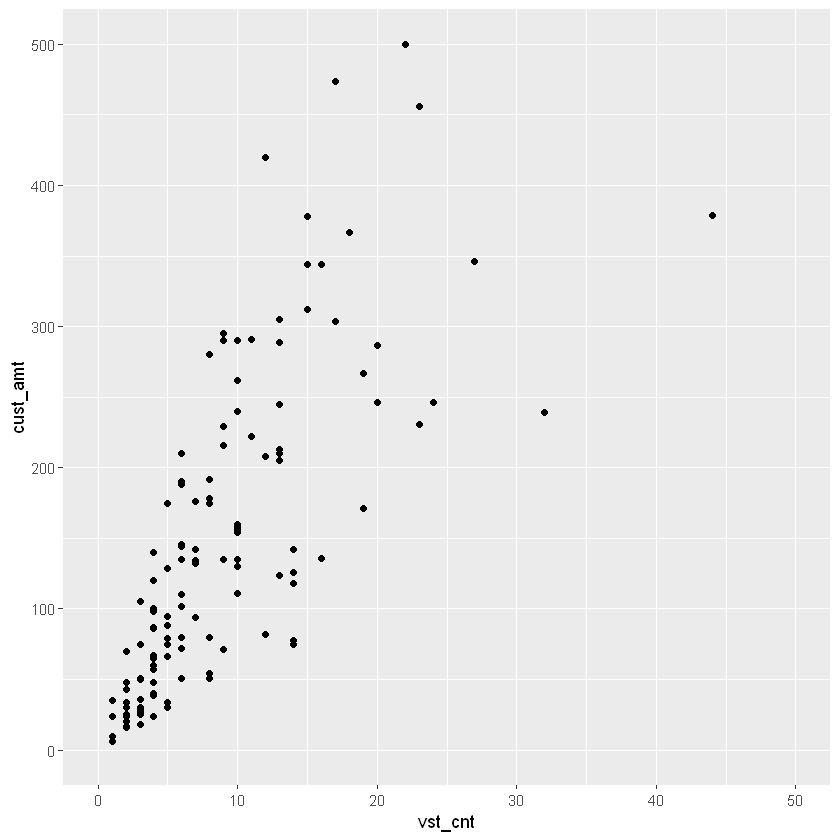

In [25]:
ggplot(data = df_sct_graph, aes(x = vst_cnt, y = cust_amt))+
    geom_point()+
    xlim(0, 50) + ylim(0, 500)

In [26]:
head(customer_r)

customer_id,customer_name,phone_number,email,first_reg_date,sex_code,birth,job,zip_code
W1346506,고객71,010-1111-1181,scust71@sfnb.co.kr,19/09/01,F,19820922,자영업,122100
W1347648,고객72,010-1111-1182,scust72@sfnb.co.kr,19/09/04,M,19940812,학생,140100
W1347756,고객73,010-1111-1183,scust73@sfnb.co.kr,19/09/05,M,19931217,NA,152100
W1347984,고객74,010-1111-1184,scust74@sfnb.co.kr,19/09/06,M,19810822,자영업,130100
W1348303,고객75,010-1111-1185,scust75@sfnb.co.kr,19/09/07,M,19900611,NA,121100
W1348424,고객76,010-1111-1186,scust76@sfnb.co.kr,19/09/08,M,19730422,NA,139100


In [27]:
df_sct_graph2 <- inner_join(df_sct_graph, customer_r, by = 'customer_id') %>% 
    select(vst_cnt, cust_amt, sex_code)

In [28]:
head(df_sct_graph2)

vst_cnt,cust_amt,sex_code
6,188,M
6,210,M
20,246,M
20,287,F
1,10,M
8,178,M


Warning message:
"Removed 5 rows containing missing values (geom_point)."

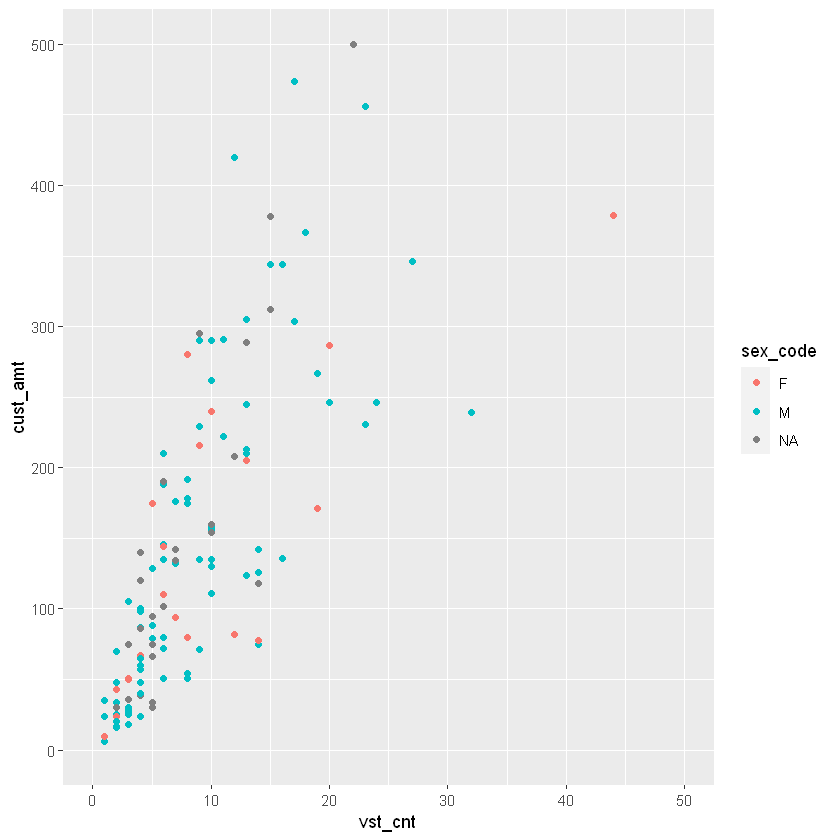

In [29]:
ggplot(data = df_sct_graph2, aes(x = vst_cnt, y = cust_amt, color = sex_code))+
    geom_point()+
    xlim(0, 50)+
    ylim(0, 500)

In [30]:
df_branch_sales_1 <- inner_join(reservation_r,order_info_r,by = 'reserv_no') %>% 
    select(branch, sales) %>% 
    arrange(branch,sales)

In [31]:
df_branch_sales_2 <- df_branch_sales_1  %>% group_by(branch) %>% 
    summarise(amt = sum(sales)/1000) %>% 
    arrange(desc(amt))

In [32]:
df_branch_sales_2

branch,amt
강남,4074
영등포,1516
종로,1428
용산,1366
서초,1295
송파,1190
서대문,1180
동작,1149
관악,1101
노원,1054


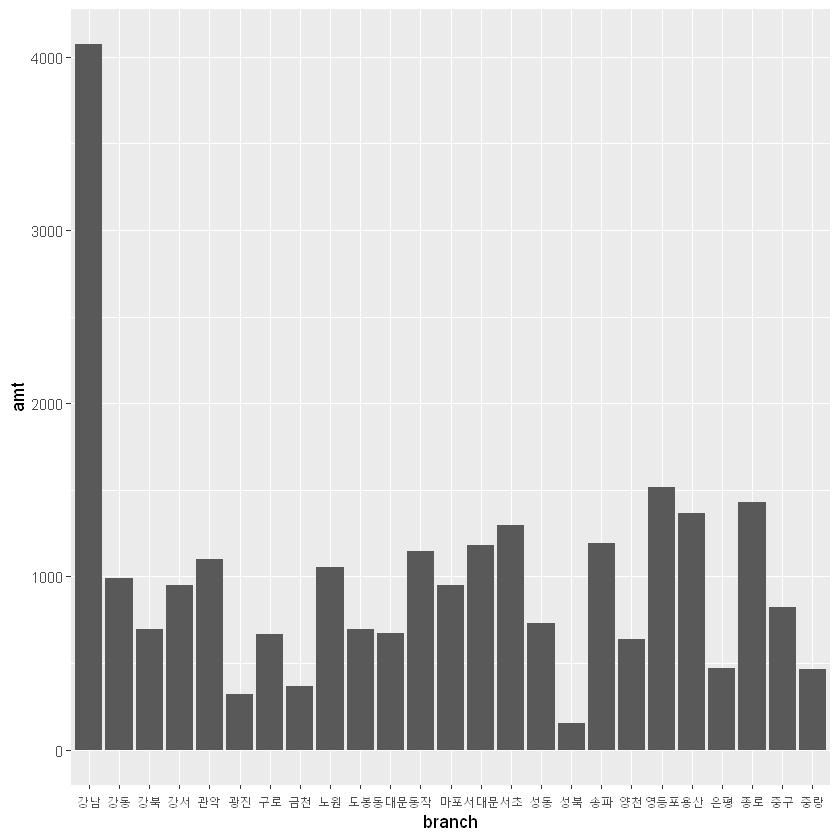

In [33]:
ggplot(df_branch_sales_2, aes(x = branch, y = amt))+
    geom_bar(stat = 'identity')

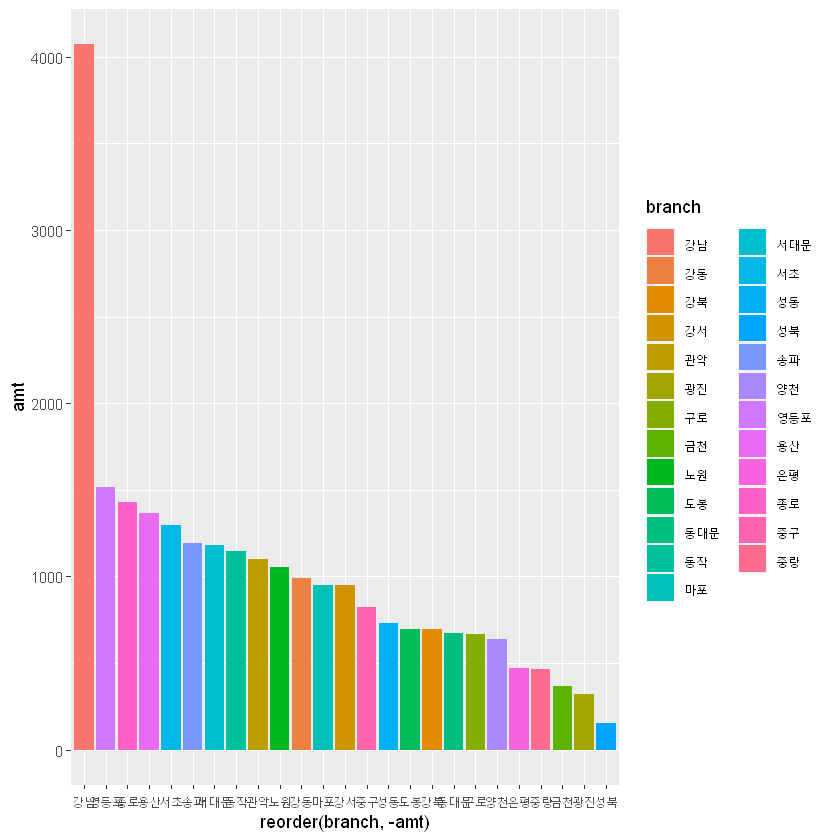

In [34]:
ggplot(df_branch_sales_2, aes(x = reorder(branch, -amt), y = amt, fill = branch))+
    geom_bar(stat = 'identity')

In [35]:
gg <- ggplot(df_branch_sales_2, aes(x = reorder(branch,-amt), y=amt, fill=branch))+
    geom_bar(stat = 'identity')+
    xlim(c('강남','영등포','종로','용산','서초'))

Warning message:
"Removed 20 rows containing missing values (position_stack)."

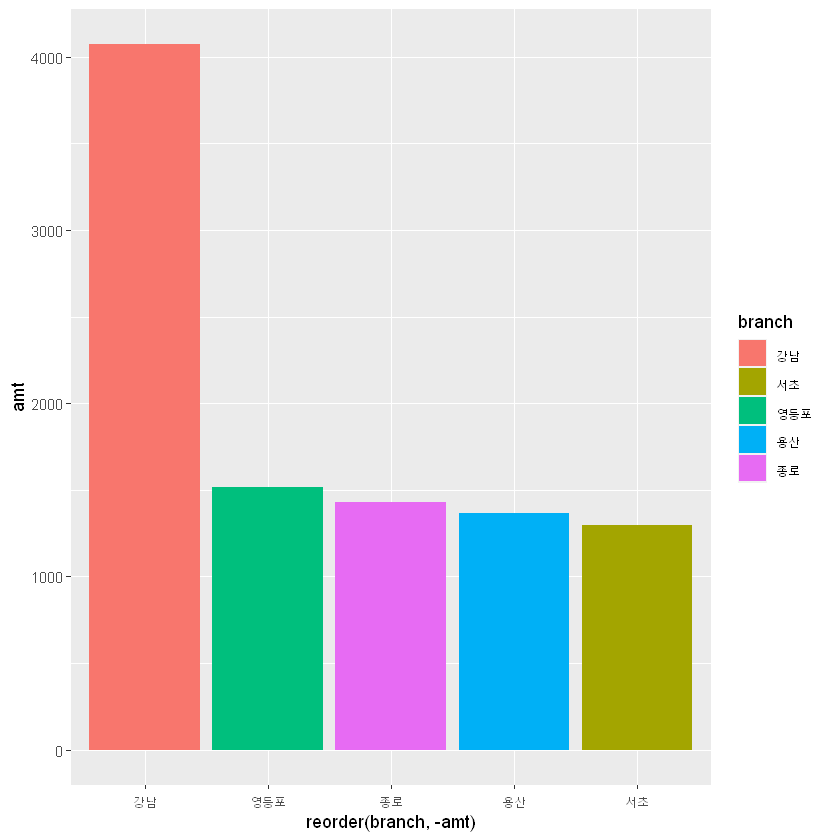

In [36]:
gg

In [37]:
gg <- gg+coord_flip()

Warning message:
"Removed 20 rows containing missing values (position_stack)."

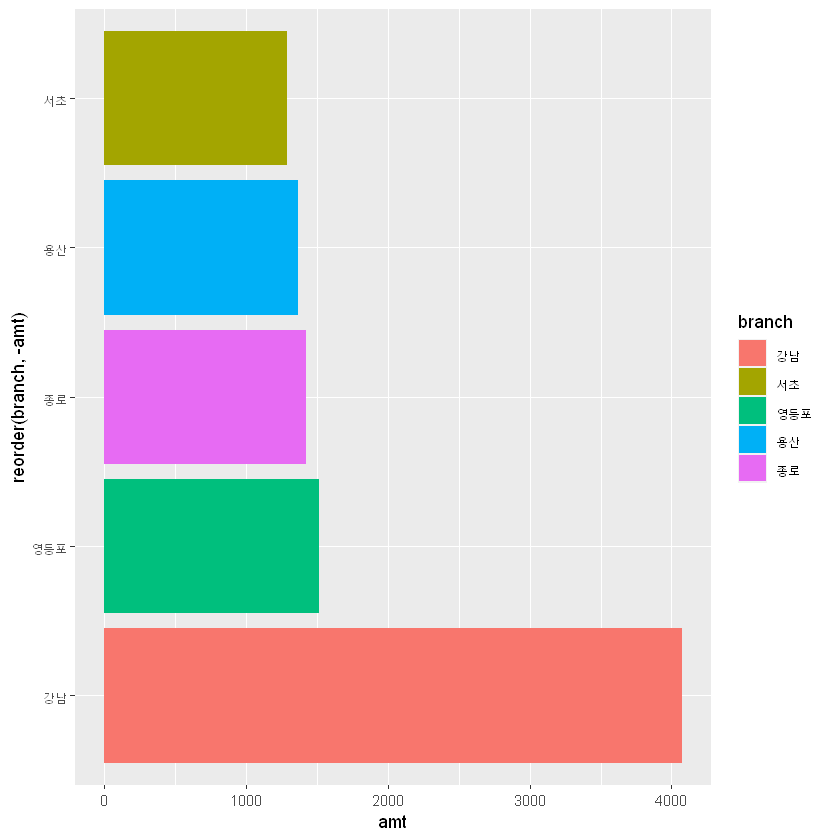

In [38]:
gg

In [39]:
gg <- gg + theme(legend.position = "bottom")

Warning message:
"Removed 20 rows containing missing values (position_stack)."

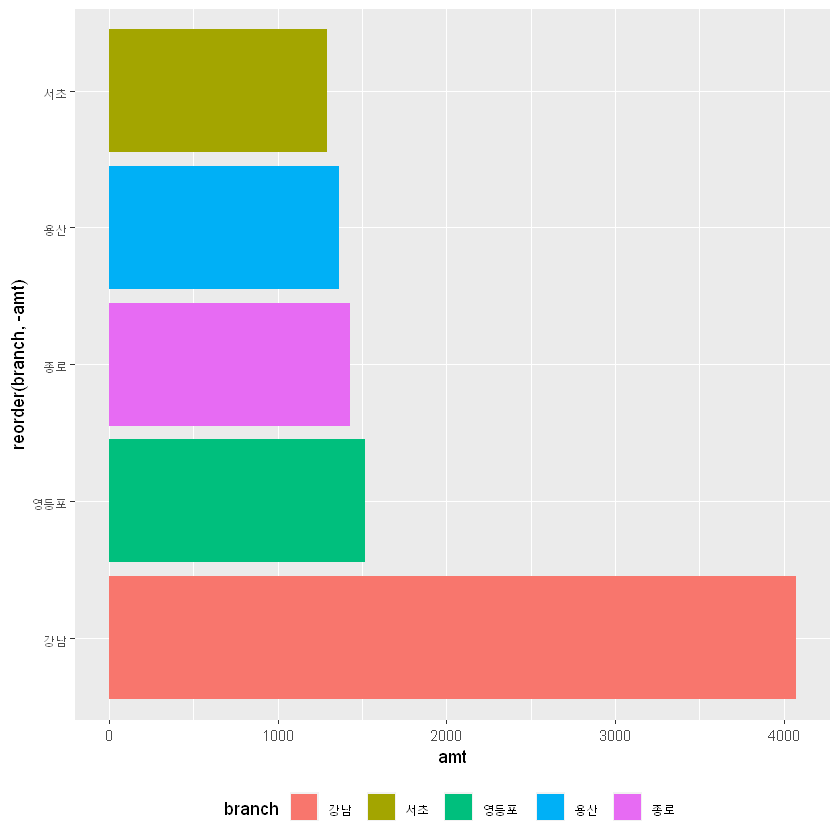

In [40]:
gg

In [41]:
gg <- gg + scale_fill_discrete(breaks = c("강남", "영등포", "종로", "용산", "서초"))

Warning message:
"Removed 20 rows containing missing values (position_stack)."

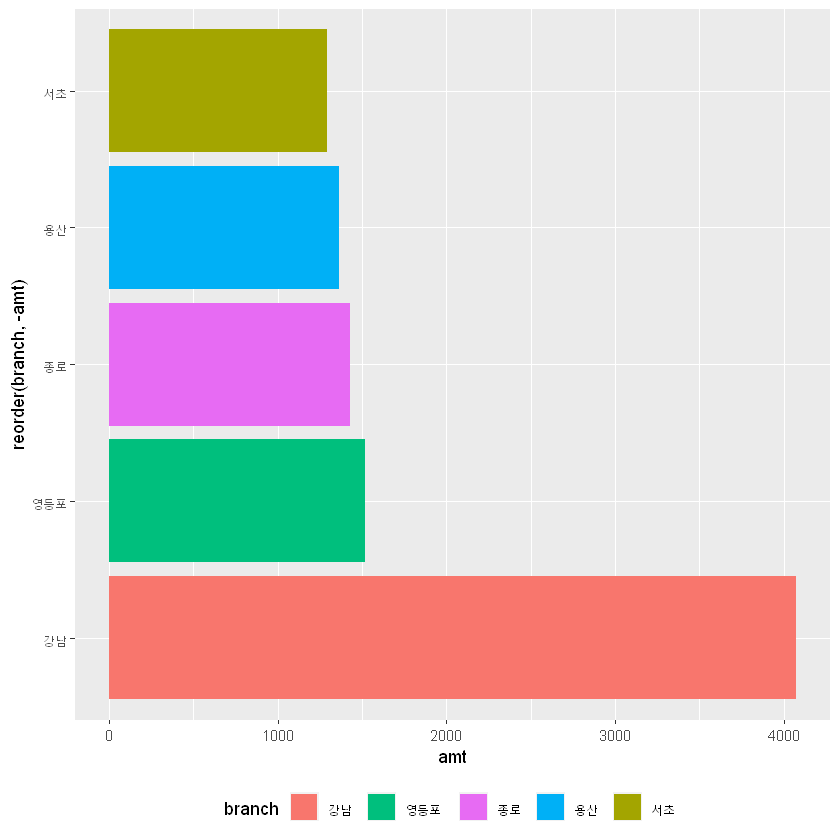

In [42]:
gg

In [43]:
gg <- ggplot(data = reservation_r, aes(x = branch)) + geom_bar(stat = "count")

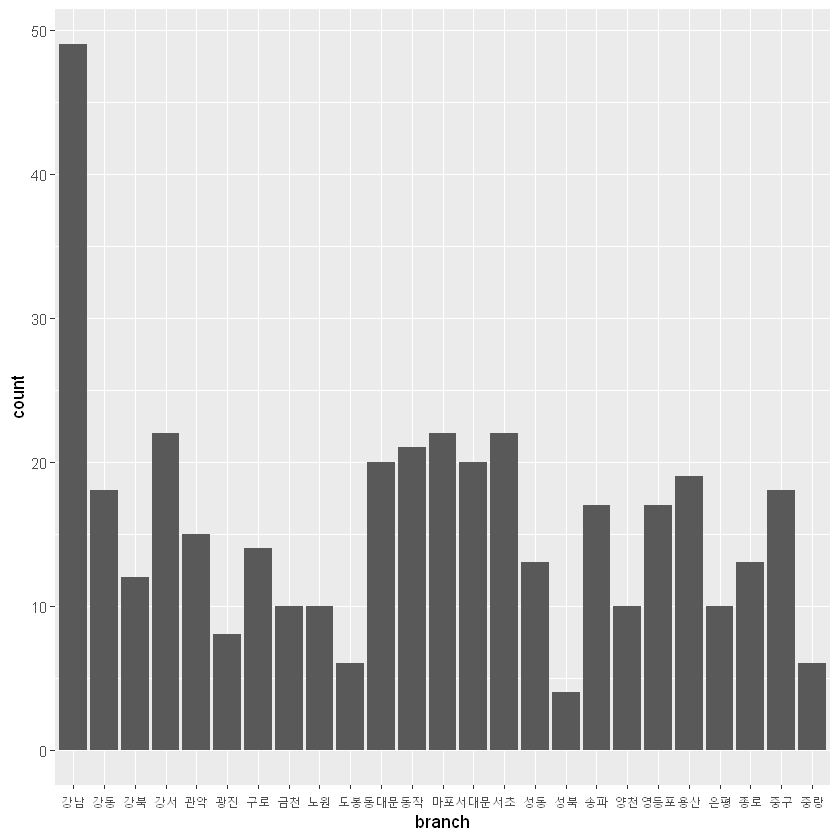

In [44]:
gg

In [45]:
gg <- ggplot(data = reservation_r, aes(x = branch)) +
    geom_bar(stat = "count") +
    labs(title = '지점별 예약 건수', x = '지점', y = '예약건')

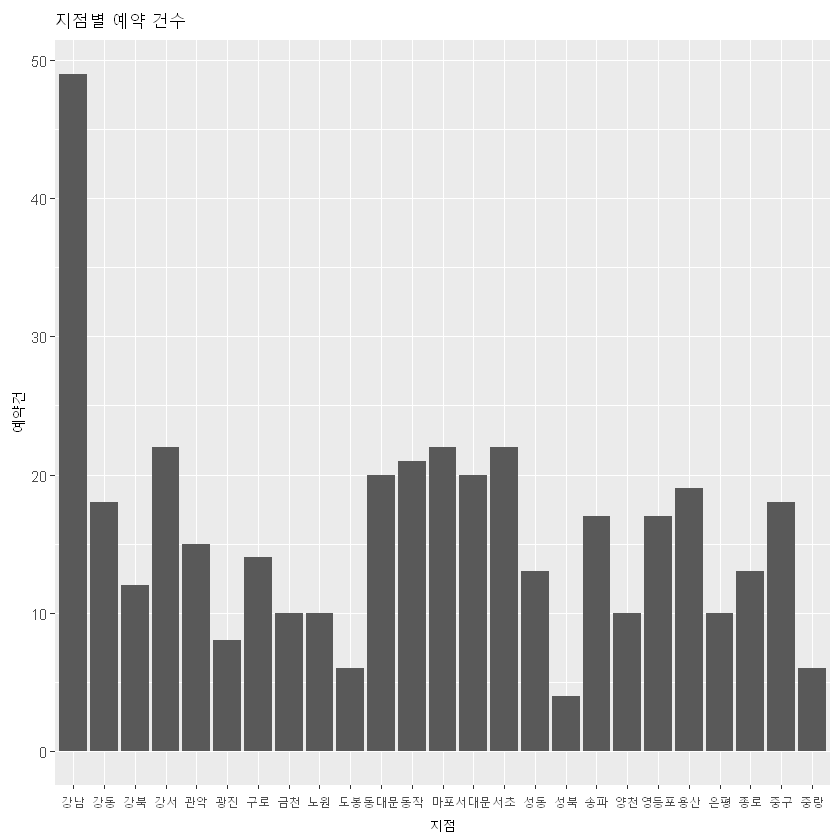

In [46]:
gg

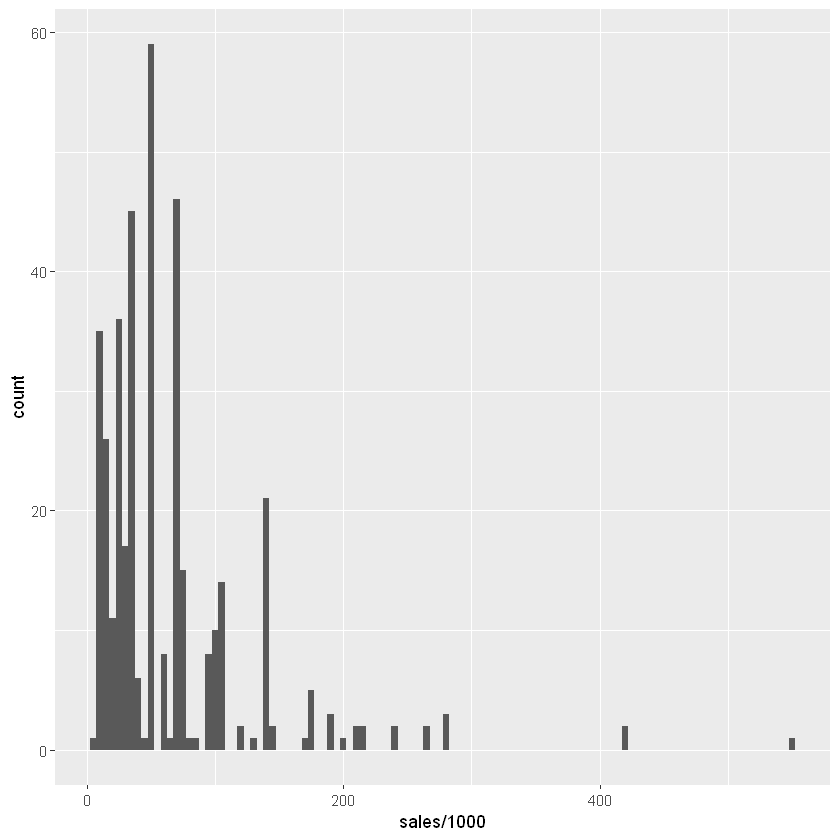

In [47]:
ggplot(data = order_info_r, aes(x = sales/1000))+
geom_histogram(binwidth = 5)

In [48]:
df_pie_graph <- inner_join(order_info_r, item_r, by = "item_id") %>%
    group_by(item_id, product_name) %>%
    summarise(amt_item = sum(sales/1000)) %>%
    select(item_id, amt_item, product_name)

df_pie_graph

item_id,amt_item,product_name
M0001,5808,SPECIAL_SET
M0002,1968,PASTA
M0003,1666,PIZZA
M0004,1625,SEA_FOOD
M0005,9380,STEAK
M0006,2075,SALAD_BAR
M0007,525,SALAD
M0008,610,SANDWICH
M0009,856,WINE
M0010,444,JUICE


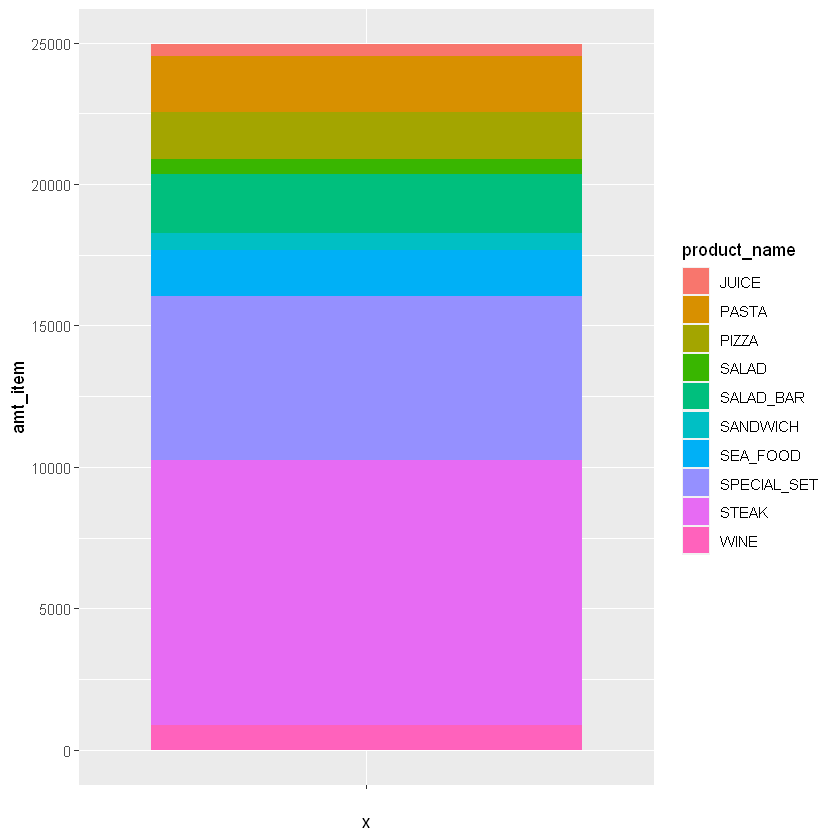

In [49]:
ggplot(df_pie_graph, aes(x = '', y = amt_item, fill = product_name))+
    geom_bar(stat = 'identity')

In [50]:
gg <- ggplot(df_pie_graph,aes(x = '', y = amt_item, fill = product_name))+
geom_bar(stat = 'identity')+
coord_polar('y', start = 0)

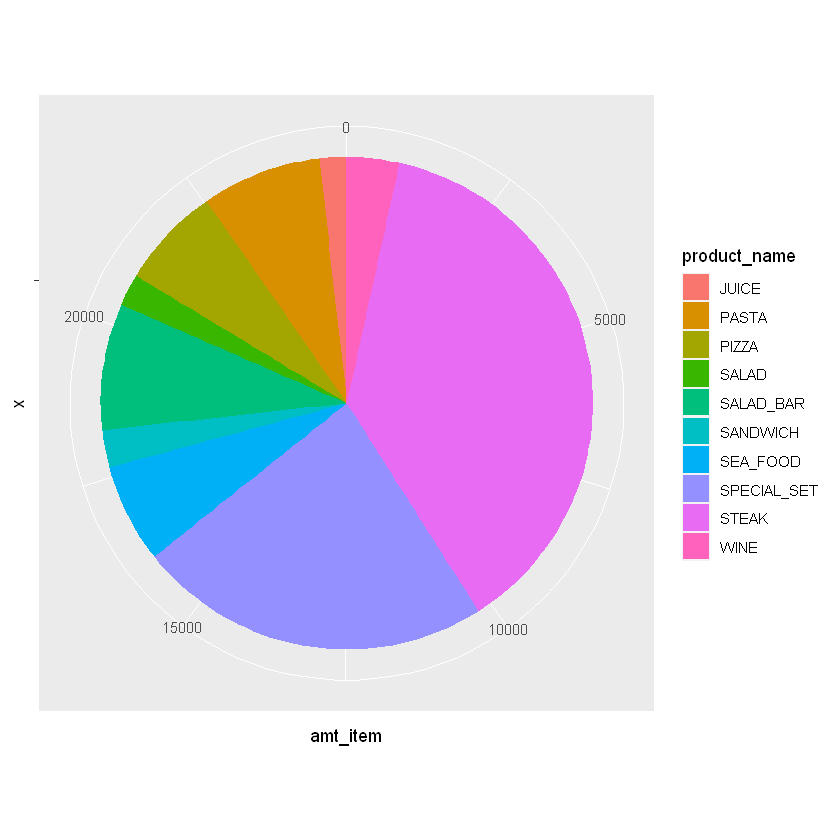

In [51]:
gg

Warning message in pal_name(palette, type):
"Unknown palette Apple"Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Greens is 9
Returning the palette you asked for with that many colors
"

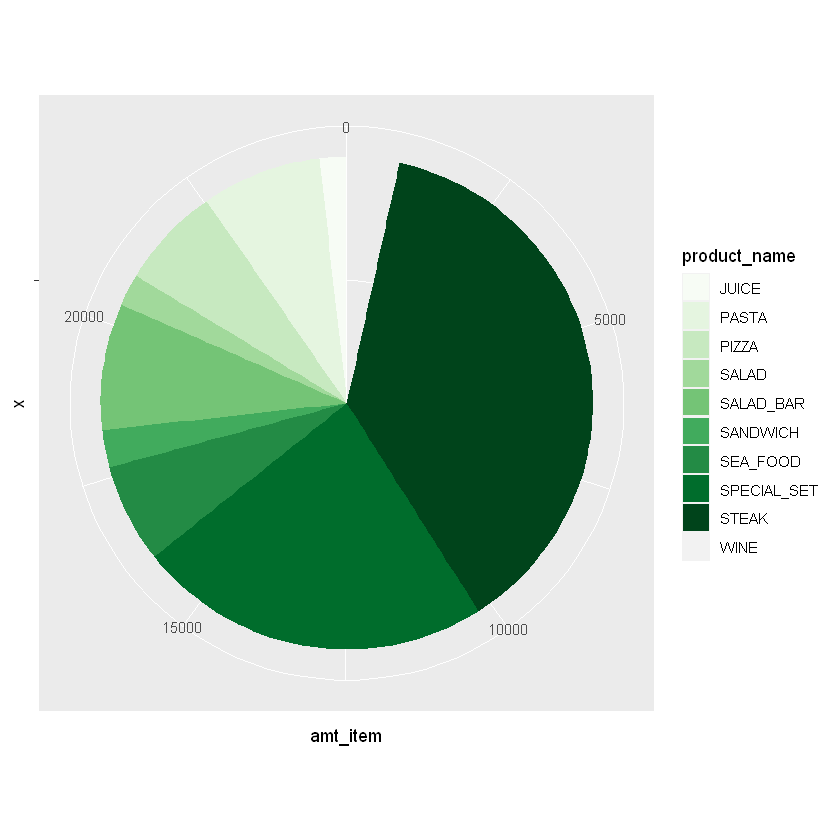

In [52]:
gg <- gg + scale_fill_brewer(palette = 'Apple')
gg

In [53]:
total_amt <- order_info_r %>% 
group_by(reserv_no) %>% 
summarise(amt_daily = sum(sales/1000)) %>% 
arrange(reserv_no)

total_amt

reserv_no,amt_daily
2019060301,140
2019060601,152
2019060701,48
2019061601,105
2019061801,48
2019062001,10
2019062201,48
2019062601,8
2019062901,54
2019070101,50


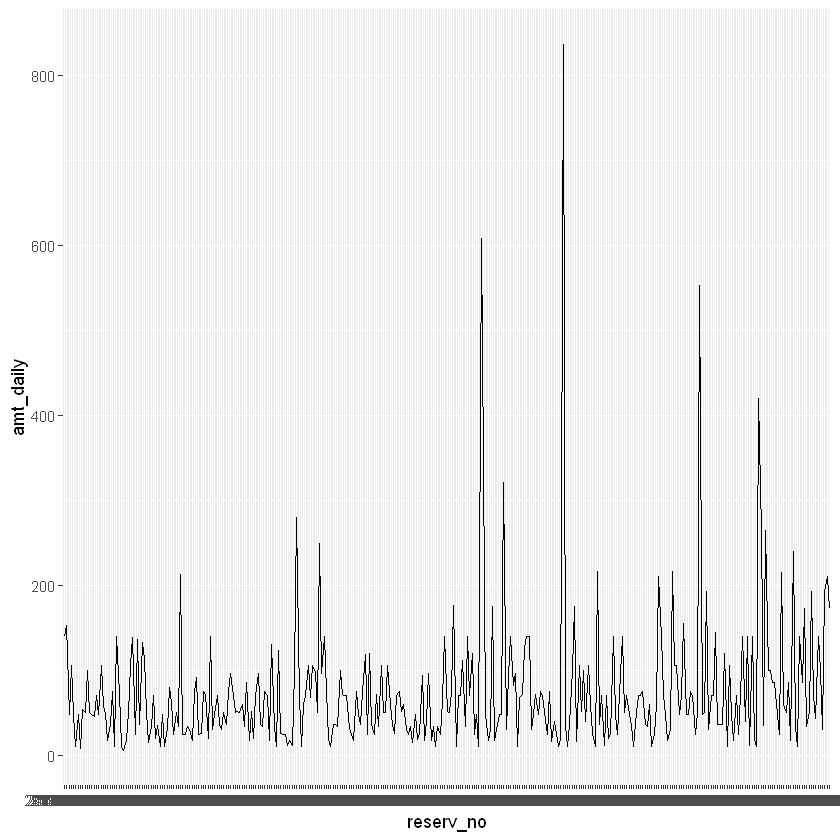

In [54]:
ggplot(total_amt,aes(x = reserv_no, y = amt_daily, group = 1)) + geom_line()

In [55]:
total_amt <- order_info_r %>% 
mutate(month = substr(reserv_no,1,6)) %>% 
group_by(month) %>% 
summarise(amt_monthly = sum(sales/1000))

total_amt

month,amt_monthly
201906,613
201907,1744
201908,1622
201909,1586
201910,3333
201911,5197
201912,10862


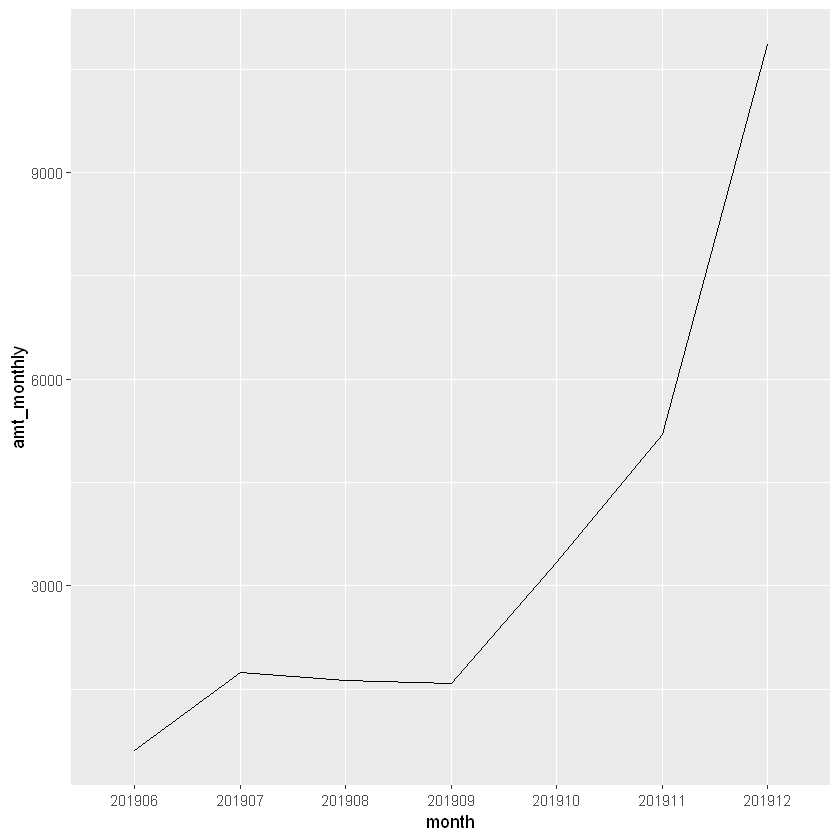

In [56]:
ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1)) + geom_line()

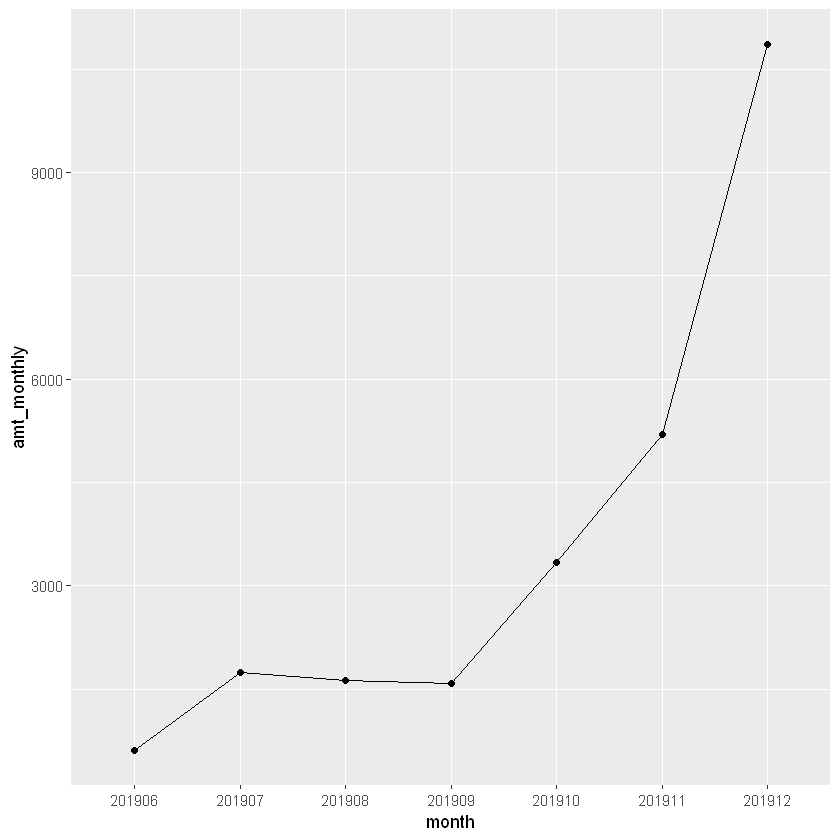

In [58]:
ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1)) +
geom_line()+
geom_point()

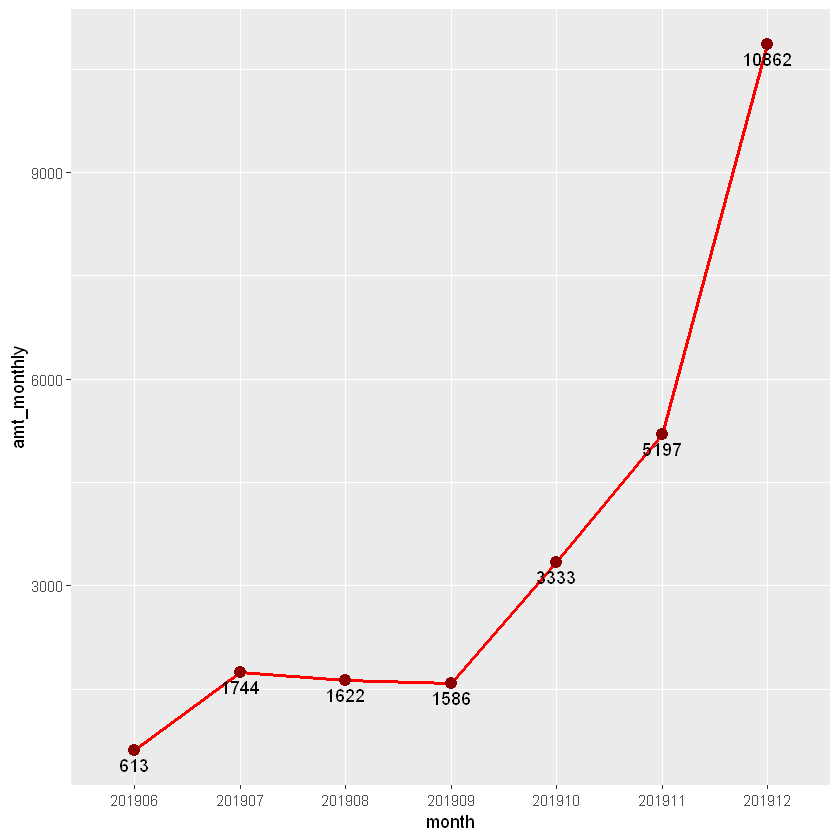

In [62]:
ggplot(total_amt, aes(x = month, y = amt_monthly, group = 1, label = amt_monthly)) +
geom_line(color = 'red', size = 1)+
geom_point(color = 'darkred', size = 3)+
geom_text(vjust = 1.5, hjust = 0.5)

In [63]:
df_boxplot_graph <- inner_join(order_info_r,item_r, by = 'item_id')

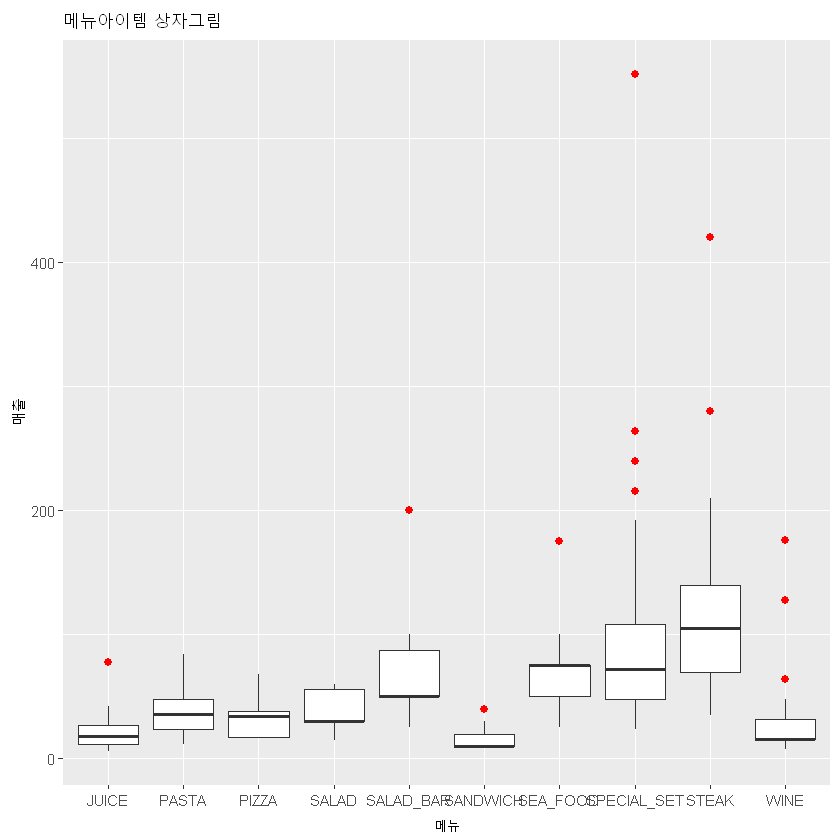

In [64]:
ggplot(df_boxplot_graph, aes(x = product_name, y = sales/1000))+
geom_boxplot(width = 0.8, outlier.size = 2, outlier.colour = 'red')+
labs(title = '메뉴아이템 상자그림', x = '메뉴', y = '매출')

In [65]:
my_first_cook <- order_info_r %>%
    mutate(reserv_month = substr(reserv_no, 1, 6)) %>%
    group_by(item_id, reserv_month) %>%
    summarise(avg_sales = mean(sales)) %>%
    arrange(item_id, reserv_month)

my_first_cook


item_id,reserv_month,avg_sales
M0001,201906,48000.00
M0001,201907,68000.00
M0001,201908,56000.00
M0001,201909,66000.00
M0001,201910,92000.00
M0001,201911,68307.69
M0001,201912,153142.86
M0002,201906,24000.00
M0002,201907,38000.00
M0002,201908,21600.00


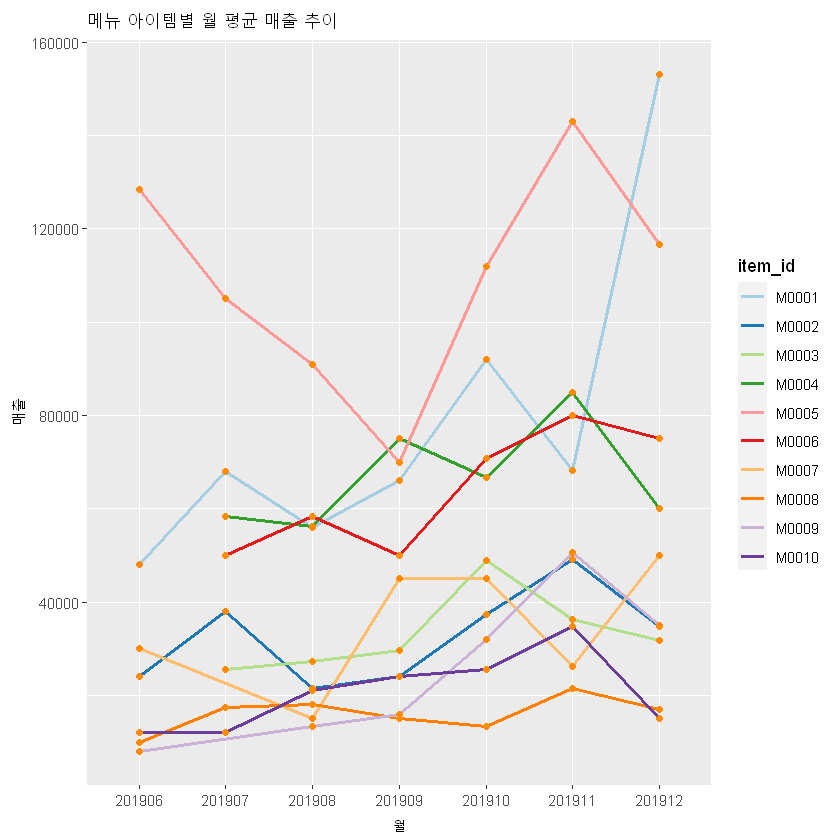

In [66]:
ggplot(my_first_cook, aes(x = reserv_month, y = avg_sales, group = item_id, color = item_id)) +
    geom_line(size = 1) +
    geom_point(color = "darkorange", size = 1.5) +
    scale_color_brewer(palette = "Paired") +
    labs(title = "메뉴 아이템별 월 평균 매출 추이", x = "월", y = "매출")

In [69]:
tail(ToothGrowth)

,len,supp,dose
55,24.8,OJ,2
56,30.9,OJ,2
57,26.4,OJ,2
58,27.3,OJ,2
59,29.4,OJ,2
60,23.0,OJ,2


ERROR: Error in ggplot(df2, aes(dose, len)): 객체 'df2'를 찾을 수 없습니다
